In [1]:
'''!pip install tensorflow --upgrade
!pip install tensorflow-probability --upgrade
!pip install tf-keras --upgrade
!pip install scikit-image --upgrade
!pip install 'imageio==2.4.0'
!pip install pyvirtualdisplay
!pip install tf-agents
!pip install pyglet
!pip install pandas pandas-ta numpy'''

"!pip install tensorflow --upgrade\n!pip install tensorflow-probability --upgrade\n!pip install tf-keras --upgrade\n!pip install scikit-image --upgrade\n!pip install 'imageio==2.4.0'\n!pip install pyvirtualdisplay\n!pip install tf-agents\n!pip install pyglet\n!pip install pandas pandas-ta numpy"

In [1]:
import os
# Keep using keras-2 (tf-keras) rather than keras-3 (keras).
os.environ['TF_USE_LEGACY_KERAS'] = '1'

from envs.moving_average_env import MovingAverageEnv
from utils import load_dataset

from tf_agents.environments import tf_py_environment
from tf_agents.policies import random_tf_policy
import matplotlib.pyplot as plt

In [2]:
df = load_dataset('./resources/KO.csv')
env = MovingAverageEnv(df=df, window_size=10, frame_bound=(2000, 2300))

In [3]:
df.iloc[0:5]

,Close,Volume,Open,High,Low,CUMLOGRET_1,CUMPCTRET_1
0,39.05,20565200,39.03,39.18,38.71,0.000000,0.000000
1,38.78,11913020,39.05,39.09,38.69,-0.006938,-0.006914
2,38.65,10237960,38.85,39.14,38.65,-0.010296,-0.010243
3,38.28,15798950,38.63,38.70,38.25,-0.019915,-0.019718
4,38.31,10307930,38.32,38.52,38.10,-0.019132,-0.018950


In [4]:
env.time_step_spec()

TimeStep(
{'step_type': ArraySpec(shape=(), dtype=dtype('int32'), name='step_type'),
 'reward': ArraySpec(shape=(), dtype=dtype('float32'), name='reward'),
 'discount': BoundedArraySpec(shape=(), dtype=dtype('float32'), name='discount', minimum=0.0, maximum=1.0),
 'observation': BoundedArraySpec(shape=(30,), dtype=dtype('float32'), name='observation', minimum=[-100000. -100000. -100000. -100000. -100000. -100000. -100000. -100000.
 -100000. -100000. -100000. -100000. -100000. -100000. -100000. -100000.
 -100000. -100000. -100000. -100000. -100000. -100000. -100000. -100000.
 -100000. -100000. -100000. -100000. -100000. -100000.], maximum=[100000. 100000. 100000. 100000. 100000. 100000. 100000. 100000. 100000.
 100000. 100000. 100000. 100000. 100000. 100000. 100000. 100000. 100000.
 100000. 100000. 100000. 100000. 100000. 100000. 100000. 100000. 100000.
 100000. 100000. 100000.])})

In [18]:
env.prices[0:5]

array([56.26, 56.44, 56.4 , 55.73, 55.83], dtype=float32)

In [6]:
eval_env = tf_py_environment.TFPyEnvironment(env)

In [7]:
random_policy = random_tf_policy.RandomTFPolicy(eval_env.time_step_spec(),
                                                eval_env.action_spec())

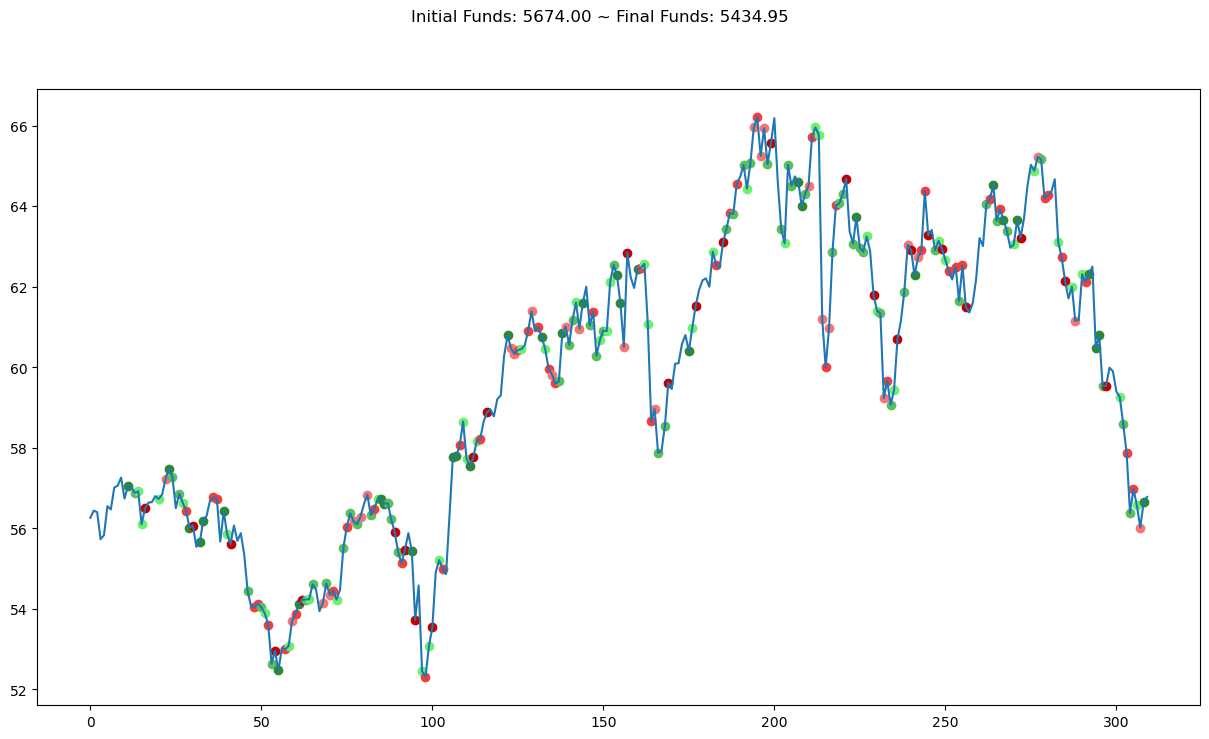

In [17]:
def render_policy_eval2(policy, filename):
    time_step = eval_env.reset()
    while not time_step.is_last():
        action_step = policy.action(time_step)
        time_step = eval_env.step(action_step.action)
        #print(time_step.observation)
    env.render('human')
    env.save_render('luqui_test')

def render_policy_eval(policy, filename):
    time_step = eval_env.reset()
    while not time_step.is_last():
        action_step = policy.action(time_step)
        time_step = eval_env.step(action_step.action)
    plt.figure(figsize=(15, 8))
    env.save_render(filename)
    
render_policy_eval(random_policy, './evals/test_env.jpg')

In [10]:
time_step = eval_env.reset()
while not time_step.is_last():
    action_step = random_policy.action(time_step)
    time_step = eval_env.step(action_step.action)
    #print(time_step)